In [54]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x = sp.symbols('x')

In [55]:
def solve_phi(phi: dict, n: int) -> None:
    if n==2:
        A = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
        F = [0, 0, 0]
        for i in range(3):
            F[i] = sp.integrate(x*phi[i], (x, 0, 1))
            for j in range(3):
                integrand = sp.diff(phi[i])*sp.diff(phi[j]) + phi[i]*phi[j]
                A[i][j] = sp.integrate(integrand, (x, 0, 1))

        w1, w2, w3 = sp.symbols('w1 w2 w3')

        A = sp.Matrix(A)
        F = sp.Matrix(F)
        W, = sp.linsolve((A, F), w1, w2, w3)
        return W
    if n==1:
        A = [[0, 0], [0, 0]]
        F = [0, 0]
        for i in range(2):
            F[i] = sp.integrate(x*phi[i], (x, 0, 1))
            for j in range(2):
                integrand = sp.diff(phi[i])*sp.diff(phi[j]) + phi[i]*phi[j]
                A[i][j] = sp.integrate(integrand, (x, 0, 1))

        w1, w2 = sp.symbols('w1 w2')

        A = sp.Matrix(A)
        F = sp.Matrix(F)
        W, = sp.linsolve((A, F), w1, w2)
        return W
    
    if n==0:
        A = [[0]]
        F = [0]
        for i in range(1):
            F[i] = sp.integrate(x*phi[i], (x, 0, 1))
            for j in range(1):
                integrand = sp.diff(phi[i])*sp.diff(phi[j]) + phi[i]*phi[j]
                A[i][j] = sp.integrate(integrand, (x, 0, 1))

        w1 = sp.symbols('w1')

        A = sp.Matrix(A)
        F = sp.Matrix(F)
        W, = sp.linsolve((A, F), w1)
        return W

In [56]:
phi_polynomial = {}
phi_polynomial[0] = x*(x-1)
phi_polynomial[1] = x**2*(x-1)
phi_polynomial[2] = x**3*(x-1)

W_polynomial = [solve_phi(phi_polynomial, n) for n in range(3)]

phi_sin = {}
phi_sin[0] = sp.sin(sp.pi*x)
phi_sin[1] = sp.sin(2*sp.pi*x)
phi_sin[2] = sp.sin(3*sp.pi*x)

W_sin = [solve_phi(phi_sin, n) for n in range(3)]

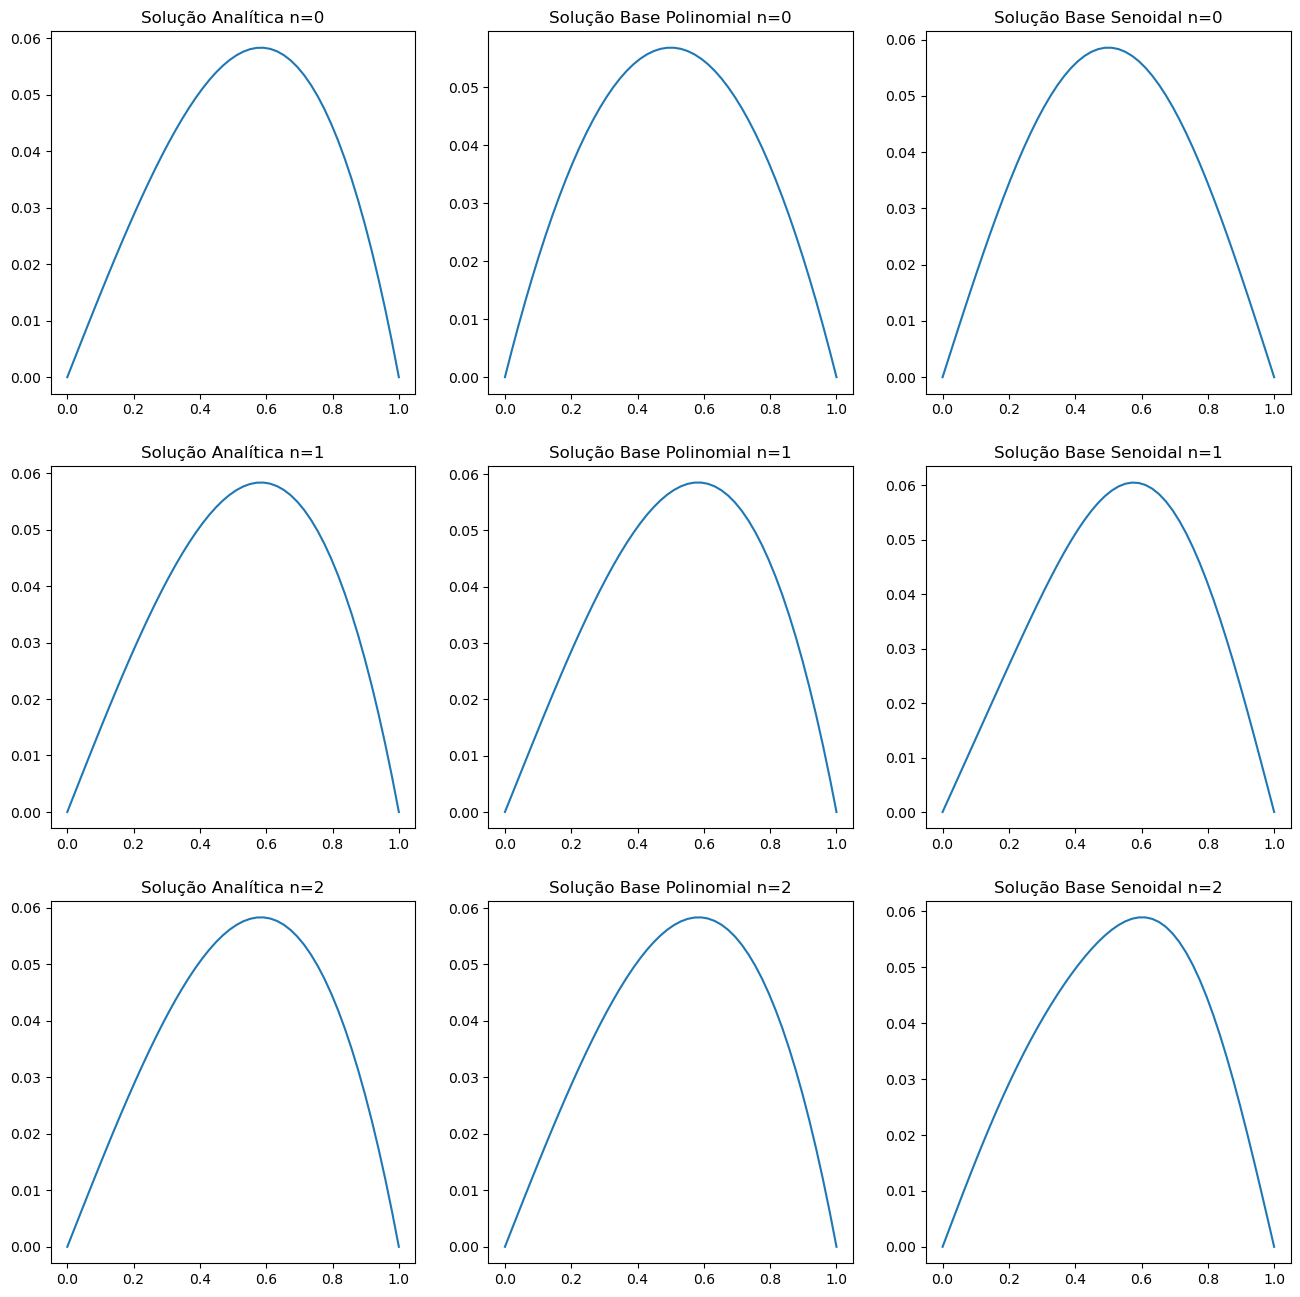

In [63]:
def uh(x_coordinate: float, phi: dict, W: tuple) -> float:
    try:
        return sum(
            [W[i]*phi[i].subs(x, x_coordinate) for i in range(len(W))]
        )
    except TypeError:
        return sum(
            [W*phi[i].subs(x, x_coordinate) for i in range(len(W))]
        )

def ue(x_coordinate: float) -> float:
    return x_coordinate - np.sinh(x_coordinate)/np.sinh(1)

x_range = np.linspace(0,1,50)
figure, axis = plt.subplots(3, 3, figsize=(16,16))


y_e = [0,0,0]
y_polynomial = [0,0,0]
y_sin = [0,0,0]
for n in range(3):
    y_e[n] = [ue(xi) for xi in x_range]
    y_polynomial[n] = [uh(xi, phi_polynomial, W_polynomial[n]) for xi in x_range]
    y_sin[n] = [uh(xi, phi_sin, W_sin[n]) for xi in x_range]

    axis[n, 0].plot(x_range, y_e[n])
    axis[n, 0].set_title(f"Solução Analítica n={n}")

    axis[n, 1].plot(x_range, y_polynomial[n])
    axis[n, 1].set_title(f"Solução Base Polinomial n={n}")

    axis[n, 2].plot(x_range, y_sin[n])
    axis[n, 2].set_title(f"Solução Base Senoidal n={n}")

plt.savefig("images/exercicio123_solucao.png", dpi=150)

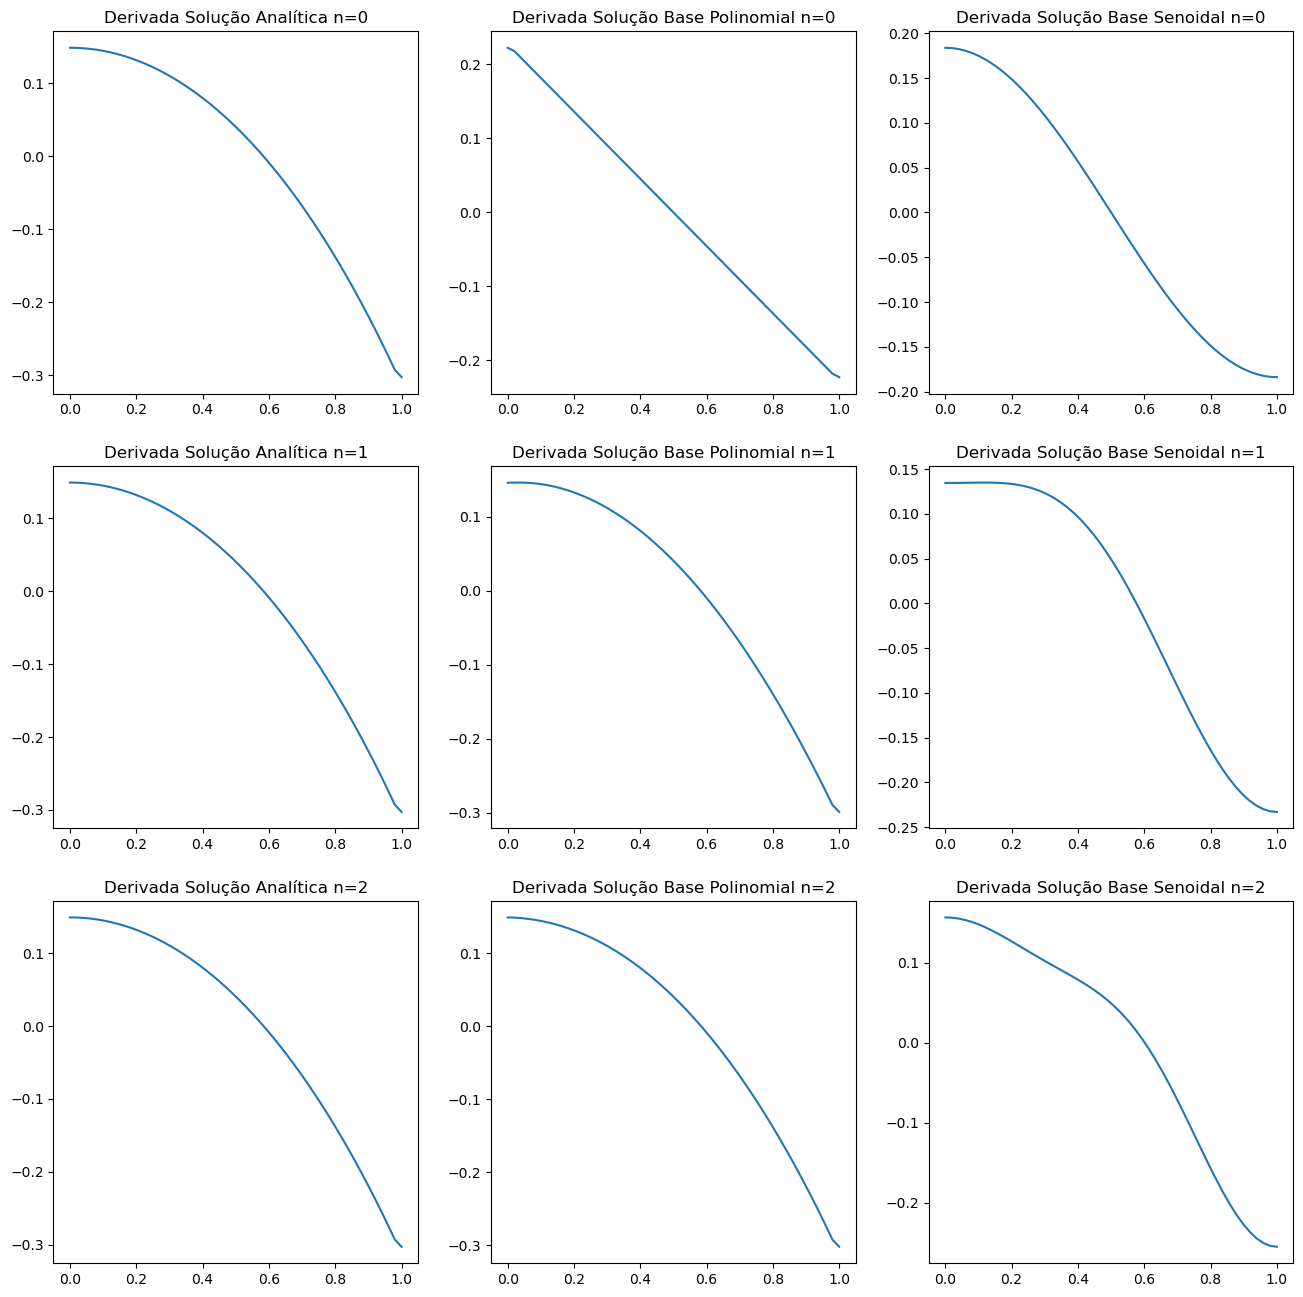

In [58]:
def numerical_derivative(x, y):
    n = len(x)
    dydx = np.zeros(n)

    # Forward difference for the first point
    dydx[0] = (y[1] - y[0]) / (x[1] - x[0])

    # Central difference for the interior points
    for i in range(1, n-1):
        dydx[i] = (y[i+1] - y[i-1]) / (x[i+1] - x[i-1])

    # Backward difference for the last point
    dydx[n-1] = (y[n-1] - y[n-2]) / (x[n-1] - x[n-2])

    return dydx

x_range = np.linspace(0,1,50)
figure, axis = plt.subplots(3, 3, figsize=(16,16))

for n in range(3):
    axis[n, 0].plot(x_range, numerical_derivative(x_range, y_e[n]))
    axis[n, 0].set_title(f"Derivada Solução Analítica n={n}")

    axis[n, 1].plot(x_range, numerical_derivative(x_range, y_polynomial[n]))
    axis[n, 1].set_title(f"Derivada Solução Base Polinomial n={n}")

    axis[n, 2].plot(x_range, numerical_derivative(x_range, y_sin[n]))
    axis[n, 2].set_title(f"Derivada Solução Base Senoidal n={n}")

plt.savefig("images/exercicio123_derivadas_solucao.png")